In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
df = pd.read_csv('../data/cleaned_data/cleaned_data_final.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,location_code,location,time,location_time,incinerated_waste,landfilled_waste,littered_waste,mismanaged_waste,recycled_waste,total_waste,total_leakage,total_use,total_waste_collected_recyc
0,CAN1,Canada,2000,CAN12000,0.151097,3.386902,0.008696,0.485324,0.127029,4.159048,0.109,5.5582,0.258
1,CAN1,Canada,2001,CAN12001,0.156862,3.495910,0.008903,0.490428,0.138619,4.290722,0.110,5.5922,0.281
2,CAN1,Canada,2002,CAN12002,0.164828,3.649937,0.009273,0.500955,0.152728,4.477721,0.113,5.8427,0.308
3,CAN1,Canada,2003,CAN12003,0.172013,3.785881,0.009570,0.508120,0.166722,4.642306,0.114,5.9738,0.335
4,CAN1,Canada,2004,CAN12004,0.180220,3.941340,0.009938,0.516935,0.182366,4.830799,0.117,6.2353,0.366


In [16]:
df_grouped = df.groupby('location').agg({'total_waste':'sum', 'recycled_waste':'sum'}).reset_index()
df_grouped

,location,total_waste,recycled_waste
0,Canada,110.042767,5.380075
1,China,802.704695,78.506480
2,India,191.609398,20.101067
3,Latin America,255.042774,21.082438
4,Middle East & North Africa,229.539931,10.009368
5,OECD Asia,174.197109,14.995849
6,OECD EU,846.695562,84.548371
7,OECD Non-EU,244.953892,13.437711
8,OECD Oceania,21.103124,1.204500
9,Other Africa,212.933089,9.894142


In [13]:
df['recyc_waste_ratio'] = df['recycled_waste']/ df['total_waste']

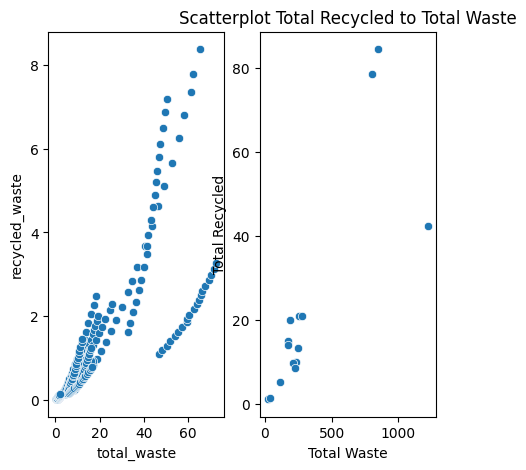

In [22]:
fig, ax = plt.subplots(1,2, figsize=(5,5))
sns.scatterplot(df, y='recycled_waste', x='total_waste', ax=ax[0])
plt.xlabel('Total Waste')
plt.ylabel('Total Recycled')
plt.title('Scatterplot Total Recycled to Total Waste')

sns.scatterplot(df_grouped, y='recycled_waste', x='total_waste', ax=ax[1])
plt.xlabel('Total Waste')
plt.ylabel('Total Recycled')
plt.title('Scatterplot Total Recycled to Total Waste')
plt.show()
plt.show()

In [11]:
corr_matrix = df[['recycled_waste','total_waste']].corr()
corr_matrix

,recycled_waste,total_waste
recycled_waste,1.000000,0.806349
total_waste,0.806349,1.000000
